In [1]:
import numpy as np
import pandas as pd
import pingouin as pg
import seaborn as sns

from scipy.stats import linregress, gmean, pearsonr
from sklearn.metrics import r2_score
from tqdm import tqdm
from Bio import SeqIO
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
from os import path
#from seq_util import *

In [2]:
# Read the NOSC values for bac120 as a wide-form matrix
bac120_nosc_df = pd.read_csv('../data/gtdb/r207/bac120_nosc_vals_wide.csv', index_col=0)

# Trim the ".1" from the end of the accession numbers so they match other GTDB data
trimmed_ids = [x.split('.')[0] for x in bac120_nosc_df.index.tolist()]
bac120_nosc_df['trimmed_accession'] = trimmed_ids

# Reset the index to the trimmed accession number
bac120_nosc_df = bac120_nosc_df.reset_index().set_index('trimmed_accession')
bac120_nosc_df

,accession,PF00380.20,PF00410.20,PF00466.21,PF01025.20,PF02576.18,PF03726.15,TIGR00006,TIGR00019,TIGR00020,...,TIGR02432,TIGR02729,TIGR03263,TIGR03594,TIGR03625,TIGR03632,TIGR03654,TIGR03723,TIGR03725,TIGR03953
trimmed_accession,,,,,,,,,,,,,,,,,,,,,
GB_GCA_000007325,GB_GCA_000007325.1,-0.148160,-0.224515,-0.271998,-0.122832,-0.222500,-0.195491,-0.189573,-0.152311,-0.116115,...,-0.239489,-0.215168,-0.138229,-0.214850,-0.219437,-0.161122,-0.178828,-0.207375,-0.232777,-0.213205
GB_GCA_000008885,GB_GCA_000008885.1,-0.225820,-0.247991,-0.235449,-0.223839,NaN,-0.212832,-0.275949,-0.212414,-0.160727,...,-0.280723,-0.219518,-0.278769,-0.307224,-0.212944,-0.103641,-0.312473,-0.254505,NaN,-0.265804
GB_GCA_000009845,GB_GCA_000009845.1,-0.210141,-0.304301,-0.323290,-0.130158,NaN,NaN,-0.202842,-0.193418,-0.160336,...,-0.243972,-0.205122,-0.180596,-0.214562,-0.172616,-0.165642,-0.229449,-0.217595,-0.288547,-0.173903
GB_GCA_000010085,GB_GCA_000010085.1,-0.097661,-0.237436,-0.161992,-0.060054,-0.167924,-0.131780,-0.111915,-0.063734,-0.064409,...,-0.078462,-0.093497,-0.132986,-0.143900,-0.152612,-0.093533,-0.164809,-0.124286,-0.153650,-0.178778
GB_GCA_000010565,GB_GCA_000010565.1,-0.187030,-0.251788,-0.224343,-0.079801,-0.200000,-0.177482,-0.149577,-0.113914,-0.096177,...,-0.179268,-0.101351,-0.181850,-0.177694,-0.190099,-0.100300,-0.222171,-0.170978,-0.203634,-0.148263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RS_GCF_907165215,RS_GCF_907165215.1,-0.168351,-0.201494,-0.224994,0.007326,-0.164994,-0.175330,-0.101722,-0.107393,-0.080776,...,-0.094517,-0.119690,-0.146439,-0.160860,-0.166670,-0.079130,-0.202686,-0.165731,-0.105502,-0.180360
RS_GCF_910593725,RS_GCF_910593725.1,-0.135314,-0.215554,-0.229864,-0.090785,-0.128396,-0.183764,-0.143342,-0.056712,-0.057451,...,-0.149315,-0.126020,-0.135354,-0.156069,-0.162119,-0.094318,-0.218050,-0.177884,-0.155941,-0.194961
RS_GCF_910593785,RS_GCF_910593785.1,-0.127126,-0.160112,-0.166364,-0.010832,NaN,-0.149092,-0.114223,-0.054536,-0.100068,...,-0.014610,-0.111930,-0.085451,-0.119093,-0.104254,-0.086850,-0.194778,-0.170642,-0.117131,-0.125924


In [3]:
# Read the annotated bac120 metadata
bac120_meta_df = pd.read_csv('../data/gtdb/r207/bac120_msa_marker_info_r207_annot.csv',
                             index_col=0)

# Read the genome average NOSC values for representative genomes
reps_genome_nosc_df = pd.read_csv('../data/gtdb/r207/genome_average_nosc.csv', index_col=0)
reps_genome_nosc_df.head()

,genome_avg_NOSC
genome_accession,
RS_GCF_000971475,-0.159401
RS_GCF_003693265,-0.119059
GB_GCA_018969935,-0.152630
GB_GCA_016790845,-0.158100
GB_GCA_900321855,-0.175164


In [4]:
# Merge the genome average values into the bac120 nosc dataframe
bac120_nosc_df = bac120_nosc_df.merge(reps_genome_nosc_df, left_index=True, right_index=True)
bac120_nosc_df.head()

,accession,PF00380.20,PF00410.20,PF00466.21,PF01025.20,PF02576.18,PF03726.15,TIGR00006,TIGR00019,TIGR00020,...,TIGR02729,TIGR03263,TIGR03594,TIGR03625,TIGR03632,TIGR03654,TIGR03723,TIGR03725,TIGR03953,genome_avg_NOSC
GB_GCA_000007325,GB_GCA_000007325.1,-0.148160,-0.224515,-0.271998,-0.122832,-0.222500,-0.195491,-0.189573,-0.152311,-0.116115,...,-0.215168,-0.138229,-0.214850,-0.219437,-0.161122,-0.178828,-0.207375,-0.232777,-0.213205,-0.223900
GB_GCA_000008885,GB_GCA_000008885.1,-0.225820,-0.247991,-0.235449,-0.223839,NaN,-0.212832,-0.275949,-0.212414,-0.160727,...,-0.219518,-0.278769,-0.307224,-0.212944,-0.103641,-0.312473,-0.254505,NaN,-0.265804,-0.258189
GB_GCA_000009845,GB_GCA_000009845.1,-0.210141,-0.304301,-0.323290,-0.130158,NaN,NaN,-0.202842,-0.193418,-0.160336,...,-0.205122,-0.180596,-0.214562,-0.172616,-0.165642,-0.229449,-0.217595,-0.288547,-0.173903,-0.225228
GB_GCA_000010085,GB_GCA_000010085.1,-0.097661,-0.237436,-0.161992,-0.060054,-0.167924,-0.131780,-0.111915,-0.063734,-0.064409,...,-0.093497,-0.132986,-0.143900,-0.152612,-0.093533,-0.164809,-0.124286,-0.153650,-0.178778,-0.147696
GB_GCA_000010565,GB_GCA_000010565.1,-0.187030,-0.251788,-0.224343,-0.079801,-0.200000,-0.177482,-0.149577,-0.113914,-0.096177,...,-0.101351,-0.181850,-0.177694,-0.190099,-0.100300,-0.222171,-0.170978,-0.203634,-0.148263,-0.179736


In [5]:
# Load metadata about all the genomes
gtdb_genome_metadata = pd.read_csv('../data/gtdb/r207/bac120_metadata_r207.tar.gz',
                                   compression='gzip', sep='\t')

# Extract the phylogeny from the metadata
gtdb_phylo = gtdb_genome_metadata.gtdb_taxonomy.str.split(';', expand=True)
gtdb_phylo.columns = ['gtdb_domain', 'gtdb_phylum', 'gtdb_class', 'gtdb_order',
                      'gtdb_family', 'gtdb_genus', 'gtdb_species']
# Strip the underscores from the names
gtdb_phylo = gtdb_phylo.applymap(lambda x: x.split('__')[1] if type(x) == str else x)
gtdb_genome_metadata = pd.concat([gtdb_genome_metadata, gtdb_phylo], axis=1)

# Rename the first column to "genome_accession" -- for some reason defaults to the filename
# Also drop the rows with no accession number
gtdb_genome_metadata = gtdb_genome_metadata.rename(
    columns={gtdb_genome_metadata.columns[0]: 'genome_accession'}).dropna(
        axis=0, subset=['genome_accession']).set_index('genome_accession')

# For some reason the accession numbers have ".1" appended to them here 
# but not in the files defining the bac120 marker genes
trimmed_ids = [x.split('.')[0] for x in gtdb_genome_metadata.index.tolist()]
gtdb_genome_metadata['trimmed_accession'] = trimmed_ids
gtdb_genome_metadata['ncbi_taxid_int'] = gtdb_genome_metadata.ncbi_taxid.astype(int)
gtdb_genome_metadata = gtdb_genome_metadata.reset_index().set_index('trimmed_accession')

/var/folders/h9/fvnb4xnn63qg71jx6ncvg62w0000gn/T/ipykernel_50445/3351634197.py:2: DtypeWarning: Columns (61,65,74,82,83,85) have mixed types. Specify dtype option on import or set low_memory=False.
  gtdb_genome_metadata = pd.read_csv('../data/gtdb/r207/bac120_metadata_r207.tar.gz',


In [6]:
# Count up the categories among the bac120
cat_counts = bac120_meta_df.COG.value_counts()

# Add descriptive annotations
cog_df = pd.read_csv('../data/COG-fun-20.csv', index_col=0)
descs = cog_df.loc[cat_counts.index].description
cat_counts = pd.DataFrame(
    dict(count=cat_counts, description=descs))
cat_counts

,count,description
COG,,
J,70,"Translation, ribosomal structure and biogenesis"
L,18,"Replication, recombination and repair"
K,6,Transcription
U,6,"Intracellular trafficking, secretion, and vesi..."
F,5,Nucleotide transport and metabolism
O,5,"Posttranslational modification, protein turnov..."
H,3,Coenzyme transport and metabolism
M,3,Cell wall/membrane/envelope biogenesis
C,2,Energy production and conversion


In [7]:
pairwise_cols = bac120_nosc_df.columns[1:-1]
mat = bac120_nosc_df[pairwise_cols].values

# Need to flatten the matrix to permute rows and cols
# correlations will not change if we only shuffle one axis
permuted = np.random.permutation(mat.flatten()).reshape(mat.shape)
permuted_df = pd.DataFrame(permuted, columns=pairwise_cols)
pingouin_corr = pg.pairwise_corr(permuted_df, method='pearson')

<AxesSubplot: xlabel='r', ylabel='Count'>

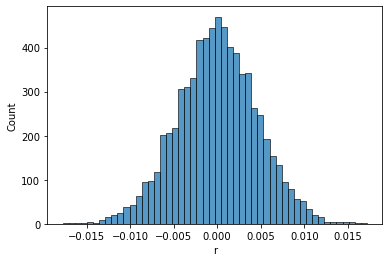

In [8]:
# Permutation totally erases the correlation structure
sns.histplot(pingouin_corr.r, bins=50)

In [9]:
# last column is genome_avg_NOSC -- 
# calculate the pairwise correlations of columns except GC
pairwise_cols = bac120_nosc_df.columns[:-1]
nosc_corr = pg.pairwise_corr(
    bac120_nosc_df, columns=pairwise_cols,
    padjust='fdr_bh')

# Now calculate the partial correlations, controlling for genome_avg_NOSC
nosc_corr_controlled = pg.pairwise_corr(
    bac120_nosc_df, columns=pairwise_cols, covar='genome_avg_NOSC',
    padjust='fdr_bh')

In [10]:
f = lambda row: ','.join(sorted(row))
def _save_corr_df(corr_df, fname):
    # Add descriptions of the two columns
    corr_df['X_desc'] = bac120_meta_df.loc[corr_df.X].Description.values
    corr_df['Y_desc'] = bac120_meta_df.loc[corr_df.Y].Description.values

    # Add COG categories of the two cols
    corr_df['X_COG'] = bac120_meta_df.loc[corr_df.X].COG.values
    corr_df['Y_COG'] = bac120_meta_df.loc[corr_df.Y].COG.values

    # Order-independent COG-pair by sorting the high-level COG-categories
    
    corr_df['COG_pair'] = list(map(f, corr_df['X_COG,Y_COG'.split(',')].values))
    
    # Save
    corr_df.to_csv(fname, index=False)

    
my_fname = '../data/gtdb/r207/bac120_nosc_corr.csv'
_save_corr_df(nosc_corr, my_fname)

my_fname = '../data/gtdb/r207/bac120_nosc_corr_controlled_for_genome_nosc.csv'
_save_corr_df(nosc_corr_controlled, my_fname)

In [11]:
nosc_corr.sort_values('r', ascending=False).head(5)

,X,Y,method,alternative,n,r,CI95%,p-unc,p-corr,p-adjust,BF10,power,X_desc,Y_desc,X_COG,Y_COG,COG_pair
3487,TIGR00344,TIGR00392,pearson,two-sided,51309,0.817759,"[0.81, 0.82]",0.0,0.0,fdr_bh,inf,1.0,alanine--tRNA ligase,isoleucine--tRNA ligase,J,J,"J,J"
3747,TIGR00392,TIGR00456,pearson,two-sided,50441,0.813436,"[0.81, 0.82]",0.0,0.0,fdr_bh,inf,1.0,isoleucine--tRNA ligase,arginine--tRNA ligase,J,J,"J,J"
3229,TIGR00194,TIGR00392,pearson,two-sided,50982,0.811021,"[0.81, 0.81]",0.0,0.0,fdr_bh,inf,1.0,excinuclease ABC subunit C,isoleucine--tRNA ligase,L,J,"J,L"
3252,TIGR00194,TIGR00634,pearson,two-sided,47523,0.810044,"[0.81, 0.81]",0.0,0.0,fdr_bh,inf,1.0,excinuclease ABC subunit C,DNA repair protein RecN,L,L,"L,L"
5518,TIGR00643,TIGR01391,pearson,two-sided,48403,0.800016,"[0.8, 0.8]",0.0,0.0,fdr_bh,inf,1.0,ATP-dependent DNA helicase RecG,DNA primase,L,L,"L,L"
